In [32]:
!pip install nltk
!pip install textblob

In [33]:
#import libraries
import matplotlib.pyplot as mp 
import seaborn as sb 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [34]:
import nltk
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/co

In [ ]:
nltk.download("punkt")

In [3]:
import numpy as np 
import pandas as pd 
dataframe=pd.read_csv('/kaggle/input/train-csv/Train.csv')#load train data
testdata=pd.read_csv('/kaggle/input/testdata/Test.csv')#load test data

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       630000 non-null  object
 1   book_id       630000 non-null  int64 
 2   review_id     630000 non-null  object
 3   review_text   630000 non-null  object
 4   date_added    630000 non-null  object
 5   date_updated  630000 non-null  object
 6   read_at       565775 non-null  object
 7   started_at    437963 non-null  object
 8   n_votes       630000 non-null  int64 
 9   n_comments    630000 non-null  int64 
 10  rating        630000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 52.9+ MB


In [5]:
#Display first 5 rows of traindata
dataframe.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating
0,e8730ce3ed5e9762038d160e23d47d79,2187,1c6af3913167e3d9d26be5a29d8df1aa,4.5 stars \n I loved this book! It was incredi...,Fri May 23 13:53:31 -0700 2014,Sun Apr 03 03:56:27 -0700 2016,Sun Mar 29 00:00:00 -0700 2015,Mon Aug 25 00:00:00 -0700 2014,0,0,4
1,26317e667d9141ad245dd2c18be52d77,47212,fa1f648451baf909683ea40bda3a06fe,I've had my dad and friend after me to read th...,Thu Jan 05 21:23:23 -0800 2017,Sun Jan 08 21:09:19 -0800 2017,Sun Jan 08 00:00:00 -0800 2017,Thu Jan 05 00:00:00 -0800 2017,1,0,4
2,bf9640b81a047ee70b4f918082492f1d,40483,ae2c43f1062ab1dae0ad51f5ea3c7c56,Anyone desiring to start an exploration of S&M...,Tue Feb 18 03:29:28 -0800 2014,Fri Feb 28 01:24:54 -0800 2014,Fri Feb 28 01:54:07 -0800 2014,Tue Feb 18 00:00:00 -0800 2014,1,1,3
3,34aa99d428ad98679c3e45d117243f55,19095025,3eb21a560e2afb02ace9e44d6fe76c8b,3.75 stars \n Mal is the best. He's crazy fun ...,Fri May 08 17:06:08 -0700 2015,Sun May 21 17:12:59 -0700 2017,Mon Sep 07 00:00:00 -0700 2015,Sun Sep 06 00:00:00 -0700 2015,1,0,4
4,6b3f929609c9d97628807d13b59b0b22,9464746,6caffed66bddb57550e777f04823fdd6,I would like to begin by saying how much I app...,Tue Feb 08 15:47:53 -0800 2011,Sat Nov 05 21:12:58 -0700 2011,Sat Nov 05 00:00:00 -0700 2011,Sun Oct 30 00:00:00 -0700 2011,0,0,5


In [7]:
#Display first 5 rows of testdata
testdata.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,6ff6f572141651ad567e301e95158a68,2418888,b3d1248da3dd5cb0c15d5e737793ca32,"[tw for book: (view spoiler)[wicca/witchcraft,...",Mon Sep 21 23:32:23 -0700 2015,Mon Sep 21 23:39:05 -0700 2015,Sat Jun 06 00:00:00 -0700 2015,NaN,0,0
1,16b60bb530dceaafde65828438bc79ca,6516450,8ac45a1ad472e40dd19245317087f009,I only found like half of them extremely inter...,Tue Apr 30 07:33:20 -0700 2013,Mon Jun 01 13:46:37 -0700 2015,Mon Jun 01 13:46:37 -0700 2015,NaN,0,0
2,7efb0e9b3ab7a9e3a5d4a0e0e4200b18,8752885,e083ab7283f9c8f0edd6f5673af348a9,The Dragon's Path sneaks up on you. You start ...,Thu Mar 20 04:08:20 -0700 2014,Fri Mar 21 10:04:10 -0700 2014,Fri Mar 21 10:04:10 -0700 2014,Thu Mar 20 00:00:00 -0700 2014,0,0
3,aed4f8ec7b4f51fcd5b7f2facea5a058,13484184,167e419508a6a188472e9568226da48a,3.5 stars \n This is well written and I was dr...,Thu Oct 02 11:47:41 -0700 2014,Wed Oct 15 07:55:45 -0700 2014,Sat Oct 11 00:00:00 -0700 2014,NaN,2,3
4,880dc69f3de6d55a0623d61dedd49868,13265293,03a8a7306e3ef4c1ffd95de068b58b4e,Crestfallen. That's what I feel after I read t...,Sun Dec 08 11:02:59 -0800 2013,Wed Dec 11 20:04:26 -0800 2013,Wed Dec 11 00:00:00 -0800 2013,Sun Dec 08 00:00:00 -0800 2013,0,0


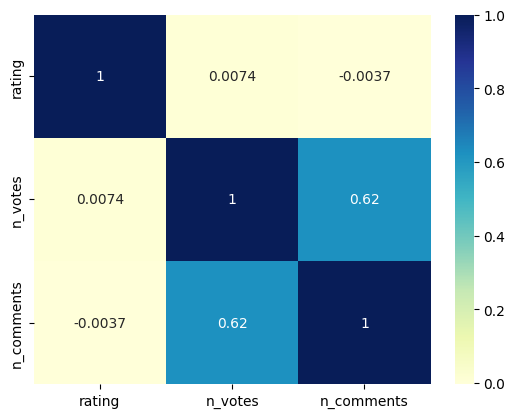

In [10]:
#display correlation between rating and other columns
dataplot = sb.heatmap(dataframe[['rating','n_votes','n_comments']].corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
mp.show() 

In [11]:
#randomly selects 75% of the rows from the original DataFrame "dataframe" and stores them in "df1"
df1=dataframe.sample(frac=0.85)
df1

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating
288748,a39eb097501827b987ce2a6c893917b6,91661,bfdb4a543323751ade4de82ec7b60989,I spent so much of this rolling my eyes at how...,Sat Jul 24 19:11:28 -0700 2010,Thu Jan 29 02:36:25 -0800 2015,Tue Aug 28 00:00:00 -0700 2012,Mon Aug 27 00:00:00 -0700 2012,0,0,4
294232,0fc8afff3e4e68201bd952cb005f6084,15881,88bba01e44258629b092ed91881a765f,** spoiler alert ** \n Another fun read. Rowli...,Fri Apr 04 06:26:12 -0700 2008,Fri Aug 15 07:20:39 -0700 2014,Fri Aug 15 07:20:39 -0700 2014,Tue Aug 05 00:00:00 -0700 2014,0,0,5
158771,405f93457153b8fcc5887f6d3e52975b,65605,424a589d2bbaf1ad7afe4c235fc19631,My autistic-spectrum son Jonathan is fascinate...,Fri Dec 05 22:28:54 -0800 2008,Mon Feb 20 00:33:34 -0800 2012,Mon Jan 01 00:00:00 -0800 1968,NaN,59,43,3
309140,90df2a781bc76c2e018d89189439d47a,20894023,412912f2c0016f72260d0503a34a1cde,4.5/5 \n I'm not someone who believes in anyth...,Thu Feb 27 16:55:32 -0800 2014,Sat Aug 08 06:06:33 -0700 2015,Sat Aug 08 06:06:33 -0700 2015,Fri Aug 07 00:00:00 -0700 2015,1,0,5
581525,65d2c03dd7911af0391d992191469a49,3166686,f4e8381c71477e5526561f5b7e9da615,I love Mary Janice Davidson. I think she write...,Tue Apr 21 11:17:53 -0700 2009,Mon May 04 07:18:42 -0700 2009,Mon May 04 07:18:42 -0700 2009,NaN,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
491237,e21627c07b1c16a64b1d55afb0801cd3,10433900,17af19354bfdcc16006ad1b5eb4f7704,Uhm... was expecting something else creepier. ...,Thu Feb 05 03:52:32 -0800 2015,Fri Feb 06 20:35:04 -0800 2015,Fri Feb 06 00:00:00 -0800 2015,Thu Feb 05 00:00:00 -0800 2015,0,0,3
204449,19759cf65a316028b6dffc8102bf6172,25755194,b8793f3e5dbadf6cc8c7690f287f93a2,Originally posted on my blog With her Head in ...,Sun Mar 13 22:55:25 -0700 2016,Wed Jun 01 16:33:44 -0700 2016,Tue Mar 29 00:00:00 -0700 2016,Sun Mar 13 00:00:00 -0800 2016,0,0,2
425735,faa97a7019925f3e8ebf094888a45c59,9165406,2a3cf830780e4f79443f6fd6773f724f,"New B&N Recommends title, first juvie title fo...",Mon Apr 04 08:31:21 -0700 2011,Mon Apr 04 08:32:20 -0700 2011,NaN,NaN,0,1,0
320329,1043b1ccbd3df0411196bbb6fd7ddd42,17315048,49ee89613dedca084d7d59bcbd30debe,oh. my. fucking. god. \n 1. Everyone in this b...,Sat Mar 21 13:15:35 -0700 2015,Sat Feb 06 09:23:50 -0800 2016,Thu Apr 09 00:00:00 -0700 2015,Sun Mar 22 00:00:00 -0700 2015,5,3,4


# **DATA PREPROCESSING**

In [12]:
#uppercase to lower case
df1.loc[:,'review_text']=df1['review_text'].str.lower()
testdata.loc[:,'review_text']=testdata['review_text'].str.lower()

In [14]:
#remove html tags
import re
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)

In [15]:
df1.loc[:,'review_text']=df1['review_text'].apply(remove_html_tags)
testdata.loc[:,'review_text']=testdata['review_text'].apply(remove_html_tags)

In [17]:
#remove url
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [18]:
df1.loc[:,'review_text']=df1['review_text'].apply(remove_url)
testdata.loc[:,'review_text']=testdata['review_text'].apply(remove_url)

In [19]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
exclude=string.punctuation

In [23]:
#remove punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [24]:
df1.loc[:,'review_text']=df1['review_text'].apply(remove_punc)
testdata.loc[:,'review_text']=testdata['review_text'].apply(remove_punc)

In [26]:
def clean_non_alph(review_text):
    return re.sub('[^a-zA-Z]',' ',review_text)

In [27]:
df1.loc[:,'review_text']=df1['review_text'].apply(clean_non_alph)
testdata.loc[:,'review_text']=testdata['review_text'].apply(clean_non_alph)

In [28]:
#tokenization
import nltk
from nltk.tokenize import word_tokenize

In [29]:
def clean_tokenization(review_text):
    return word_tokenize(review_text)

In [31]:
df1.loc[:,'review_text']=df1['review_text'].apply(clean_tokenization)
testdata.loc[:,'review_text']=testdata['review_text'].apply(clean_tokenization)

In [35]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
#remove stopwords
stop_words=set(stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

In [37]:
df1.loc[:,'review_text']=df1['review_text'].apply(clean_stopwords)
testdata.loc[:,'review_text']=testdata['review_text'].apply(clean_stopwords)

**Stemming**

In [38]:
# Initialize Python porter stemmer
ps = PorterStemmer()

In [39]:
def clean_stemming(token):
    return [ps.stem(word=w) for w in token]

In [ ]:
#perform stemming on training data
df1['review_text'].apply(clean_stemming)

In [ ]:
#perform stemming on testing data
testdata['review_text'].apply(clean_stemming)

In [ ]:
#join tokens within the 'review_text' column back into strings
df1.loc[:,'review_text'] = df1['review_text'].apply(lambda tokens: ' '.join(tokens))
testdata.loc[:,'review_text'] = testdata['review_text'].apply(lambda tokens: ' '.join(tokens))

# Calculate polarity scores for Reviews

In [ ]:
#create polarity scores based on reviews
def create_polarity_scores(dataframe, dependent_var):
  sia = SentimentIntensityAnalyzer()
  dataframe["polarity_score"] = dataframe[dependent_var].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
create_polarity_scores(df1, "review_text")

In [ ]:
create_polarity_scores(testdata, "review_text")

**Define Column Tranformers**

In [ ]:
#designed to preprocess specific columns of a dataset, applying different transformations to each column.
##we have used tfidf vectorizer for review test and minmax scaler for polarity
MAX_FEAT_DESCP = 50000
preprocess = ColumnTransformer(
    [('review_tfidf', TfidfVectorizer(max_features = MAX_FEAT_DESCP, stop_words = 'english', ngram_range=(1,2), min_df=10), 'review_text'),
     ("num_preprocess", MinMaxScaler(), ["polarity_score"])],
    remainder='passthrough')

**Make Pipeline**

In [ ]:
#creates a machine learning pipeline using scikit-learn's make_pipeline function
model = make_pipeline(
    preprocess,
    LogisticRegression(multi_class='multinomial',max_iter=10000))

**Training and Testing Data**

In [ ]:
#defining training and test data
y_train=df1['rating']
X_train=df1[['review_text','polarity_score']]
X_test=testdata[['review_text','polarity_score']]

**Fit Model**

In [ ]:
#fit the model with help of pipeline
model.fit(X_train, y_train)

In [ ]:
#find rmse value for training data
y_train_pred = model.predict(X_train)


train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
print('Train RMSE: %.4f' % train_rmse)


In [ ]:
#predict ratings for testdata
testdata['rating']=model.predict(X_test)

In [ ]:
#drop unnecessary columns from dataframe
testdata=testdata.drop(['user_id','book_id','review_text','date_added','date_updated','read_at','started_at','n_votes','n_comments'],axis=1)

****Download The Testdata csv ****

In [ ]:
#convert testdata dataframe to csv
testdata.to_csv('test20a.csv')

In [ ]:
#generates a hyperlink in HTML format that allows users to download a CSV file when rendered in an IPython environment
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='test20a.csv')